<a href="https://colab.research.google.com/github/priya-200/Flight-Price-Prediction/blob/main/%F0%9F%9B%ACFlight_Price_Prediction_%F0%9F%9B%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Price Prediction 🛬

### Dataset Link :
 https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data

### INTRODUCTION:
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

###FEATURES:

The various features of the cleaned dataset are explained below:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10.Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.



## IMPORT STATEMENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## GET DATASET

In [2]:
df = pd.read_excel('/content/drive/MyDrive/UDEMY /EXPLORATORY DATA ANALYSIS/flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## EXPLORATORY DATA ANALYISIS

from collections.abc import ValuesView
Problems that I see with the dataset on first view:

1. The Date_of_Journey column is not in Date-Time Formate
2. Source and Destination are categorical Value
3. The Route has more complications
4. Dep_Time is not in correct Formate
5. Arrival_Time columns is not in right formate or not in same pattern around the dataframe
6. Duration is in hours formate combined with minutes formate
7. Total_stops is in categorical type but we can convert it in numeical formatters
8. Additional info columns has No_info for most of the row values

In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Check for null values.

In [6]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [7]:
df.dropna(inplace = True)

Check for duplicate values

In [56]:
df.duplicated().sum()

222

In [57]:
df.drop_duplicates(inplace = True)

In [58]:
df.shape

(10460, 13)

### Date_of_Journey Column

Date_of_Journey is in object datatype so we can convert into pandas dateTime formate

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey'].dtypes

<ipython-input-8-e3497fbbf6d3>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


dtype('<M8[ns]')

The date can't be understood by the model so we can convert this into seperate data,month,year columns

In [9]:
df['Date'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Year'] = pd.DatetimeIndex(df['Date_of_Journey']).year

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


I think the Year column is same for every rows

In [11]:
df['Year'].unique()

array([2019], dtype=int32)

As the year column is same for every rows we can drop it

In [12]:
df.drop(['Year'],axis = 1,inplace = True)

Drop the Date_of_journey Columns as we have done the feature engineering on that column

In [13]:
df.drop(['Date_of_Journey'],axis = 1,inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int32 
 11  Month            10682 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 1.2+ MB


### Airlines column

Lets explore what are the Airlines that we are dealing with

In [15]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Source and Destination

Let's explore the source column

In [16]:
sorted(df['Source'].unique())

['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']

Let's explore the Destination column

In [17]:
sorted(df['Destination'].unique())

['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']

Delhi and new Delih has same airport so we can change the New Delhi column to delhi

In [18]:
df['Destination'] = df['Destination'].replace('Delhi','New Delhi')

In [19]:
sorted(df['Destination'].unique())

['Banglore', 'Cochin', 'Hyderabad', 'Kolkata', 'New Delhi']

In [20]:
df['Source'] = df['Source'].replace('Delhi','New Delhi')
sorted(df['Source'].unique())

['Banglore', 'Chennai', 'Kolkata', 'Mumbai', 'New Delhi']

### Routes

In [21]:
df.drop(['Route'],axis = 1,inplace = True)

### Arraival Time

In [22]:
df['Arrival_Time_Hour'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[0].astype('int')
df['Arrival_Time_Min'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[1].astype('int')

In [23]:
df.drop(['Arrival_Time'],axis = 1,inplace = True)

### Duration

In [24]:
df['Duration_In_Hours'] = df['Duration'].str.split(" ").str[0].str[:-1].astype(int)
df['Duration_In_Hours'].isna().sum()

0

In [25]:
df['Duration_In_Minutes'] = df['Duration'].str.split(" ").str[1].str[:-1]
df['Duration_In_Minutes'] = df['Duration_In_Minutes'].fillna(0)
df['Duration_In_Minutes'] = df['Duration_In_Minutes'].astype(int) + (df['Duration_In_Hours']*60)
df['Duration_In_Minutes']

,Duration_In_Minutes
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [26]:
df.drop(['Duration_In_Hours','Duration'],axis = 1,inplace = True)

### Additional Info Column

In [27]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

See in this there are two values No info and No Info So we can replace this with one value

In [28]:
df['Additional_Info'] = df['Additional_Info'].replace('No info','No Info')

### Departure Time Column

In [29]:
df['Departure_Time_Hour'] = df['Dep_Time'].str.split(":").str[0].astype(int)
df['Departure_Time_Minute'] = df['Dep_Time'].str.split(":").str[1].astype(int)

In [30]:
df.drop(['Dep_Time'],axis = 1,inplace = True)

### Total Stops Columns

In [31]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [32]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop','0')
df['Total_Stops'] = df['Total_Stops'].replace('1 stop','1')
df['Total_Stops'] = df['Total_Stops'].replace('2 stops','2')
df['Total_Stops'] = df['Total_Stops'].replace('3 stops','3')
df['Total_Stops'] = df['Total_Stops'].replace('4 stops','4')
df['Total_Stops'] = df['Total_Stops'].astype(int)

## Column Transformations

In [33]:
df.sample(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Time_Hour,Arrival_Time_Min,Duration_In_Minutes,Departure_Time_Hour,Departure_Time_Minute
6704,IndiGo,Kolkata,Banglore,0,No Info,5644,1,5,14,5,155,11,30
8514,IndiGo,Chennai,Kolkata,0,No Info,3597,1,5,15,35,140,13,15
9598,IndiGo,Kolkata,Banglore,0,No Info,4174,1,4,12,20,165,9,35
410,Air India,New Delhi,Cochin,2,No Info,12392,18,5,19,15,1560,17,15
6957,Air Asia,Kolkata,Banglore,0,No Info,4384,6,3,22,5,150,19,35


In [34]:
df['Airline'].nunique()

12

In [35]:
cat_cols = df.select_dtypes(include='object').columns
cat_transform_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])
processor = ColumnTransformer([
    ('cat', cat_transform_pipeline, cat_cols)
])
processed_data = processor.fit_transform(df)

In [36]:
feature_names = processor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)
df_encoded = pd.DataFrame(processed_data.toarray(), columns=feature_names)

In [37]:
df_encoded.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Visualizations

See How many Airline Counts are there

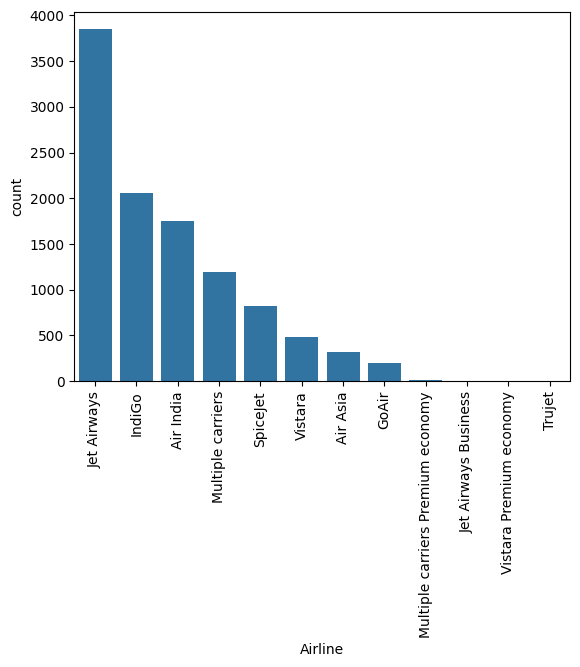

In [38]:
sns.barplot(x = df['Airline'].value_counts().index,y = df['Airline'].value_counts())
plt.xticks(rotation = 90)
plt.show()

From where there are many number of peoples boarding their flights?

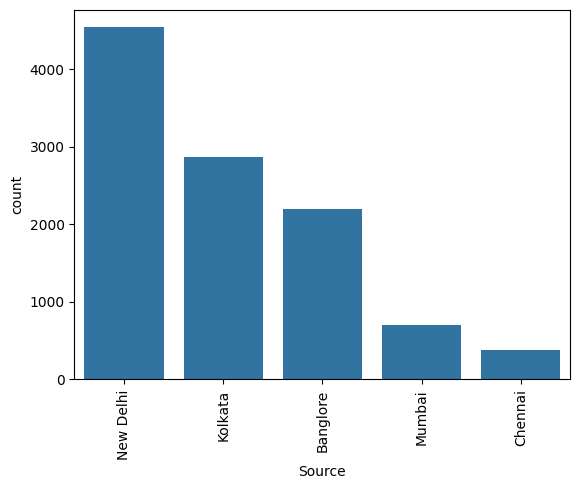

In [39]:
sns.barplot(x = df['Source'].value_counts().index,y = df['Source'].value_counts())
plt.xticks(rotation = 90)
plt.show()

Where there are large mass of people getting off??

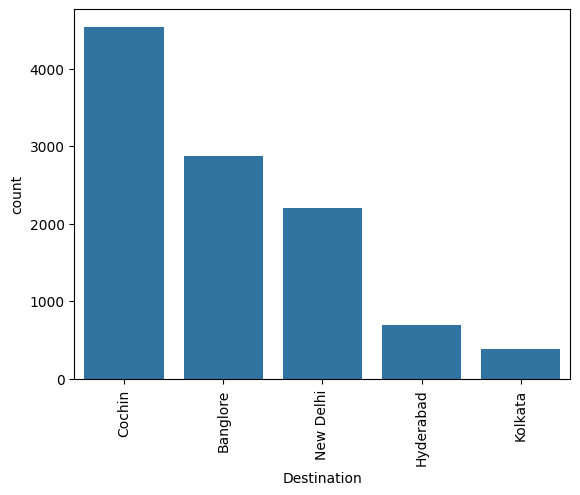

In [40]:
sns.barplot(x = df['Destination'].value_counts().index,y = df['Destination'].value_counts())
plt.xticks(rotation = 90)
plt.show()

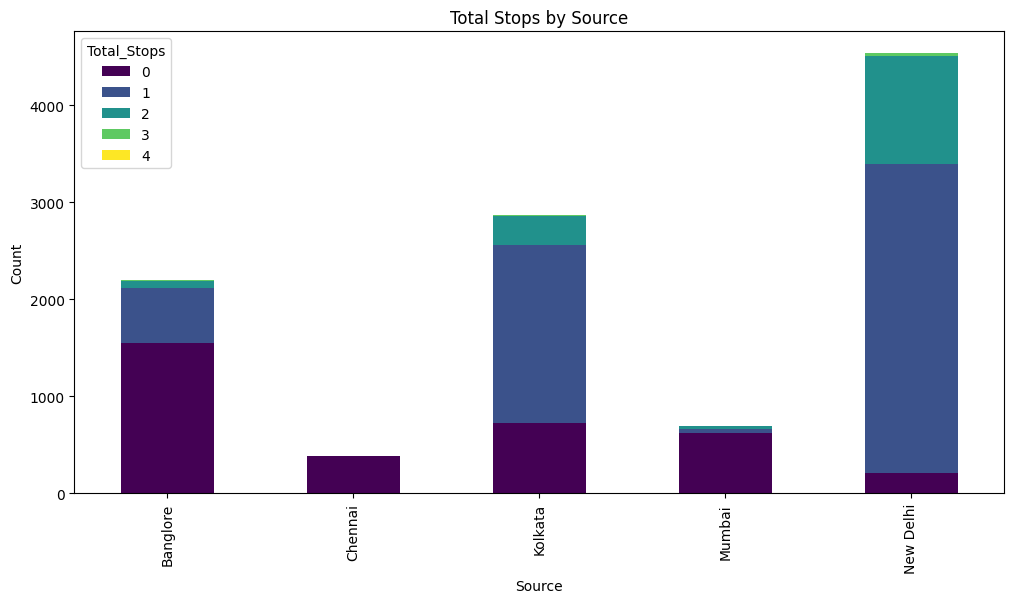

In [41]:
stop_counts = df.groupby(['Source', 'Total_Stops']).size().unstack()
stop_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Total Stops by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

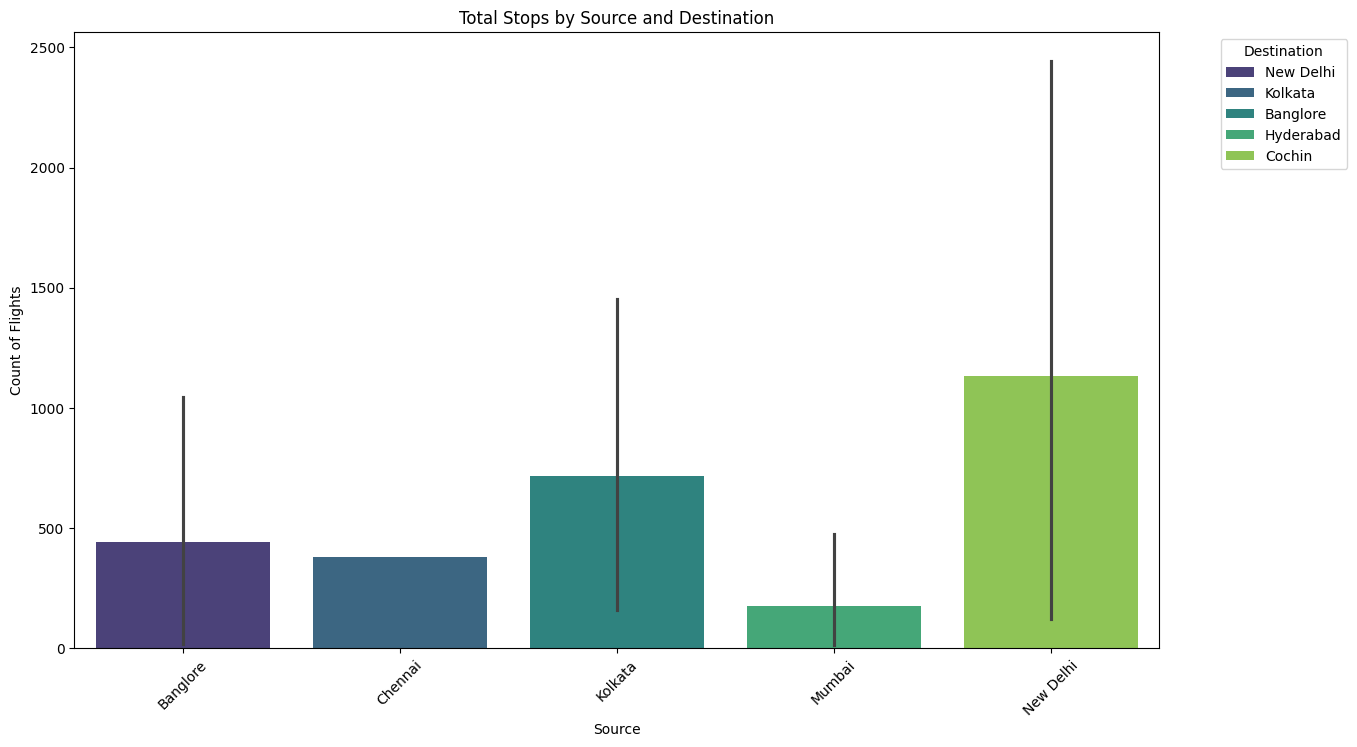

In [42]:
grouped_data = df.groupby(['Source', 'Destination', 'Total_Stops']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='Source', y='Count', hue='Destination', palette='viridis')
plt.title('Total Stops by Source and Destination')
plt.ylabel('Count of Flights')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

What is the avegrage Duration of Each Combinations of flights??

In [43]:
df.groupby(['Source','Destination'])['Duration_In_Minutes'].mean()

,,Duration_In_Minutes
Source,Destination,
Banglore,New Delhi,376.329085
Chennai,Kolkata,139.619423
Kolkata,Banglore,747.248346
Mumbai,Hyderabad,192.137733
New Delhi,Cochin,817.852734


Duration vs Price

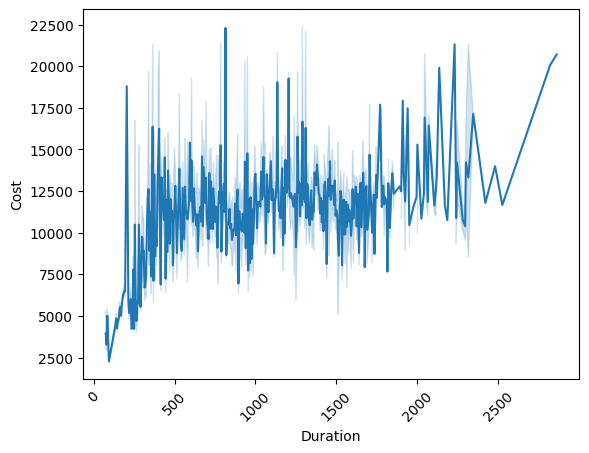

In [46]:
sns.lineplot(x = df['Duration_In_Minutes'],y = df['Price'])
plt.xticks(rotation = 45)
plt.ylabel("Cost")
plt.xlabel("Duration")
plt.show()

Destination vs cost

In [53]:
df.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending = False)

,,Price
Source,Destination,
New Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,New Delhi,8017.464269
Mumbai,Hyderabad,5059.708752
Chennai,Kolkata,4789.892388


In [51]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Arrival_Time_Hour', 'Arrival_Time_Min',
       'Duration_In_Minutes', 'Departure_Time_Hour', 'Departure_Time_Minute'],
      dtype='object')

Airline Vs Price

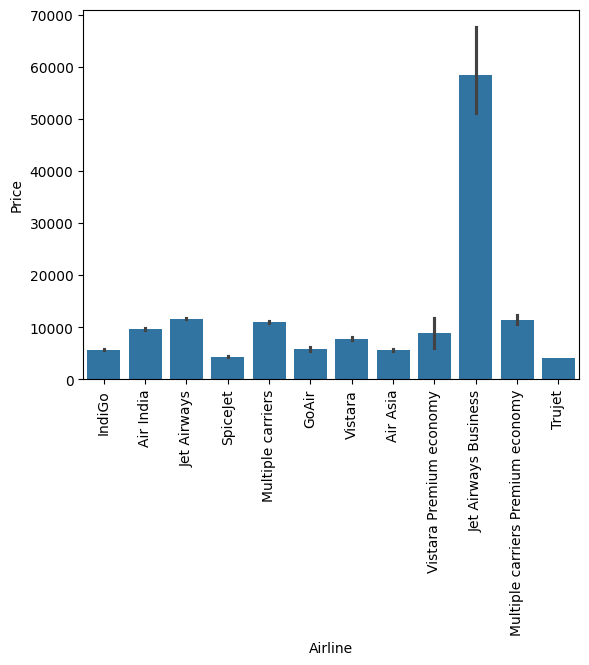

In [54]:
sns.barplot(x = df['Airline'],y = df['Price'])
plt.xticks(rotation = 90)
plt.show()